# **Freesound General-Purpose Audio Tagging Challenge** 
### **Recognize sounds automatically and classify them with appropriate labels**

**Course Section**: DSCI 598 Capstone

**Programming Language**: Python

**Project Type**: Audio Classification

**Project Created by**: Linh Pho

## Freesound_Audio Project Description

Freesound General-Purpose Audio Tagging Challenge is a collaborative database of Creative Commons Licensed sounds. The objective of this Kaggle competition is to classify audio files that cover real-world sounds from various musical instruments, humans, animals, machines, etc. Few of the labels are: Cello, Gunshots, Fart, Applause and Finger_sapping. One of the primary challenges is that not all labels are manually verified. With that in mind, this project is set to create a model that can attempt to correctly identify the true label for each given audio files. The data set contains a total of 9473 audio files within the training set and 9400 audio files within the test set. The audio files are in a wav format. The plan is to convert all of the audio files into images in a form of a spectrogram. This will allow us to perform image classification to help identify the true label for each audio files. This is also a binary classification problem. The audio files are labeled as 0 or 1, where 0 = Not verified and 1 = Verified. To evaluate the submission of the work, the Mean Average Precision @3 (MAP@3) was used.

## Importing Packages

In [ ]:
!pip install -U efficientnet -qq

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

import os
import cv2

import IPython.display as ipd 

import librosa 
import librosa.display

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

import efficientnet.tfkeras as efn

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Freesound_Audio Data Analysis
We'll start with some underlying statistics such as label distribution, total number of unique labels, and sample sizes in this section.

### **Number of audio files in the training and test set**

In [ ]:
train = pd.read_csv("../input/freesound-audio-tagging/train.csv")
test = pd.read_csv("../input/freesound-audio-tagging/sample_submission.csv")

print('The shape of the training data size: ', train.shape)
print('The shape of the test data size: ', test.shape)

**There are a total of 9473 audio files within the training set while there are 9400 audio files within the test set.**

### **Unique Labels**

In [ ]:
uniq_labels = train.label.unique()
print('There are a total of', len(uniq_labels), 'unique labels.\n')
print(uniq_labels)

**There are a total of 41 unique labels within the Freesound_Audio dataset.**

### **Label Distribution**

In [ ]:
(train.manually_verified.value_counts() /len(train)).to_frame().T

In [ ]:
train.manually_verified.value_counts().plot(kind='bar', xlabel='MGMT_value', ylabel='Count', 
                                     color=['#1E90FF', '#00C957'], edgecolor='black');

In [ ]:
labels_count = train.manually_verified.value_counts()

plt.pie(labels_count, labels=['Not Verified', 'Verified'], startangle=180, 
        autopct='%1.1f', colors=['#EE2C2C','#009ACD'], shadow=True)

plt.figure(figsize=(16,16))
plt.show()

**The first diagram illustrates a bar chart that shows the number of observations in class 0 that have not been validated and those in class 1 that have been verified. The second diagram, on the other hand, presents a basic pie chart that reveals that around 61 percent of audio files in the dataset have not been validated, while approximately 39 percent have been validated.**

### **Audio Samples**

In [ ]:
gunshot = '../input/freesound-audio-tagging/audio_train/0048fd00.wav'
ipd.Audio(gunshot)

In [ ]:
signal, sr = librosa.load(gunshot)
print(type(signal))
print(type(sr))
print(signal.shape)
print(sr)
print(len(signal) / sr)

In [ ]:
plt.figure(figsize = [12,3])
plt.subplot(2,1,1)
plt.plot(signal)
plt.subplot(2,1,2)
interval = range(2000, 3000)
plt.plot(interval, signal[interval])
plt.tight_layout()
plt.show()

In [ ]:
x1 = librosa.feature.melspectrogram(y=signal, sr=22050)   
x2 = librosa.power_to_db(x1, ref=np.max)   

print(x2.shape)

librosa.display.specshow(x2, sr=22050, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

**This portion contains a randomly selected audio file that was loaded into the notebook.  The random audio file indicates a gunshot, as may be seen here. Then I made a diagram that shows the audio signal before converting it to a spectrogram image for further analysis.**

## Freesound_Audio Challenges & Resolutions

One of the first challenges I encountered since starting this course was my inability to quickly familiarize myself with Kaggle's platform. It took some time for me to get accustomed to Kaggle because I had never used it before. Using Kaggle as frequently as possible, at least multiple times each week, was one technique to further familiarize myself with the platform.

The second challenge I encountered was that the dataset I was working with included a range of different audio file lengths. Some audio files are five seconds long, while others are ten seconds long. After acknowledging the problem, a solution was implemented that involved trimming the duration of each audio file to 2 seconds and then transforming the audio files into a spectrogram.

The third challenge I ran into while working on this project was slow runtime when it came to training the model. My code used to take a few hours to execute each model, which prevented me from progressing as quickly as I would have liked. I was able to overcome this problem by turning on the GPU, which allowed the notebook to run much faster than it did previously, saving at least an hour or two. Kaggle gives a limited number of GPU hours per user. Users were able to turn on the GPU to improve their project performance over time.

Obtaining low public scores for each of the notebooks that I made for the Freesound Audio project was one of the most difficult challenges I experienced while working on this project. A handful of the notebooks I had made had a public score of less than 0.40, with the private score being worse than the public score. While working on the project, I came up with a plan of adjusting the dropout rate as well as the convolutional layers. As a result, I was able to enhance my public score by twice as much as it was before.

## Freesound_Audio Model Architecture Summary 

When I first started working on the Freesound Audio project, my main goal was to get a public score of at least 0.80. I began this process by working on a few scatch notebooks in which I constructed all of the models for each notebook from scratch, without using any pre-trained models. The instructor provided me with a pre-cropped 128 by 32 spectrogram images dataset for the first three models I developed. Because each audio file has a varied length of audio, the pre-cropped dataset was used. This also applies to the spectrogram images. When the images are pre-cropped, the results are more fair than when the images are not pre-cropped.As a result, the validation accuracy of each model result within the three scratch models ranged from 32 to 47 percent. Later on, I was able to boost the validation accuracy score to 50-69 percent by just tweaking the CNN architecture of each model within each of the three scratch notebooks. I was able to fulfill the goal of generating a public score greater than 0.8 for all three models after making several modifications to the models.

In the next step of my path, I decided to look into more advanced techniques that could help me boost my project's results even more. I decided to reproduce the scratch notebooks and use the transfer learning concept in each one. Transfer learning refers to the use of pre-trained models generated for one task as the foundation for a model on a different task. With that in mind, I utilized five different pre-trained models for the sake of this project: VGG16, VGG19, ResNet50, EfficientNetB0, and EfficientNetB1. Aside from EfficientNetB0 and EfficientNetB1, I decided to apply fine-tuning to all pre-trained models in this part of the project. Fine-tuning is defined as taking a model that has already been trained for one task and modifying or tweaking it to accomplish a second task that is similar to the first. I was able to get a little better result after fine-tuning the three pre-trained models compared to when we didn't fine-tune the pre-trained models. I was able to get a public score of 0.75 to 0.81 after executing the code.

I opted to use both EfficientNet B0 and B1 without fine-tuning for my last two models. I was able to obtain a better public score for both models compared to all of the previous models after modifying the CNN architecture of the models and using the pre-trained model. I was able to achieve a public score between 0.88 and 0.90 based on the findings of both EfficientNet notebooks. In conclusion, a good model with a public score more than 0.80 that can classify audio files to their true labels could be produced. After working with models that used transfer learning approaches and those that didn't, I can certainly declare that applying transfer learning to models can increase the model's accuracy and performance significantly.

The table below shows the best results within each notebook that was worked on.

| Model Architecture  	| Image Size  | Epochs  	| Private Score  	| Public Score   | Link to Notebooks  | Notebook Version |
|---	|---	|---	|---	|---	|---	|---	|
| Freesound_Audio v01   | 128x32  | 50  	| 0.79368 	| 0.83111  	|[[LP] Freesound_Audio v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-v01)  | 3 |
| Freesound_Audio v02  	| 128x32  | 50  	| 0.79702  	| 0.82890  	|[[LP] Freesound_Audio v02](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-v02)  | 2 |
| Freesound_Audio v03  	| 128x32  | 50  	| 0.79497  	| 0.82502  	|[[LP] Freesound_Audio v03](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-v03)  | 2 |
| Freesound_Audio_VGG16 v01 | 128x32  | 75  | 0.77457 | 0.81672  	|[[LP] Freesound_Audio_VGG16 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-vgg16-v01)	| 27 |
| Freesound_Audio_VGG19 v01 | 128x32  | 105  |  0.73479 	|  0.75193 	|  [[LP] Freesound_Audio_VGG19 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-vgg19-v01)  	| 6 |
| Freesound_Audio_ResNet50 v01  	| 128x32  | 65  |  0.77097 	| 0.81118  	| [[LP] Freesound_Audio_ResNet50 v01]( https://www.kaggle.com/code/linhpho1/lp-freesound-audio-resnet50-v01)  | 4 |
| Freesound_Audio_EfficientNet_B0 v01  	| 128x32  | 50  |  0.86836 	| 0.88205  	| [[LP] Freesound_Audio_EfficientNet_B0 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-efficientnet-b0-v01)  | 9 |
| Freesound_Audio_EfficientNet_B1 v01  	| 128x87  | 40  |  0.87349 	| 0.90531  	| [[LP] Freesound_Audio_EfficientNet_B1 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-efficientnet-b1-v01)  | 10 |


## Freesound_Audio Final Model Evaluation

After working with several notebooks with different setup, transfer learning with EfficientNetB1 was selected as my final model. With this model, I was able to achieve the highest public score out of the other seven notebooks where the public score was 0.90531 and the private score being 0.87349. According to the first diagram below, we can see that both the loss and accuracy begins to level out after 30th epoch. The accruacy was about 79% where it performed siginificantly better than the other models.

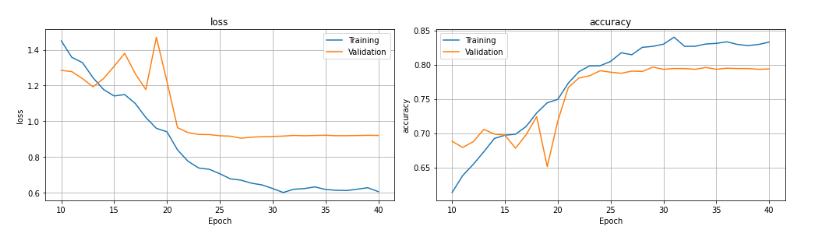

**Top 3 Submission**

After evaluating the model using 'Mean Average Precision @3 (MAP@3)', the second diagram below displays the three potential labels per audio files formatted in wav. Mean Average Precision @3 simply takes the average of all correct labels out of three per file, which is then scored by Kaggle to provide us with a public and private score. 

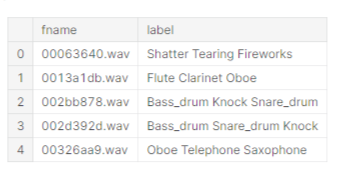


## Conclusion

I was able to develop many convolutional neural network (CNN) models in separate notebooks to classify various audio files as part of the Freesound Audio project. To develop my best final model, I was able to use a pre-trained model called EfficientNetB1. I was able to attain a validation accuracy of around 79 percent with that final model. The final model was able to achieve a public score of 0.90531 and a private score of 0.87349 in the Kaggle competition. The initial goal was to achieve a public score of greater than 0.80, but after witnessing what our final model can accomplish, I believe we can improve the results even more by altering the CNN architecture and learning rate.


## Freesound_Audio Links for Portfolio

**Below are the links to other notebooks related to this projects protfolio:**

**EDA Notebook:**
* [[LP] Freesound_Audio_EDA_Notebook](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-eda-notebook)

**Training Notebooks:**
* [[LP] Freesound_Audio v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-v01)
* [[LP] Freesound_Audio v02](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-v02)
* [[LP] Freesound_Audio v03](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-v03)
* [[LP] Freesound_Audio_VGG16 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-vgg16-v01)
* [[LP] Freesound_Audio_VGG19 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-vgg19-v01)
* [[LP] Freesound_Audio_ResNet50 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-resnet50-v01)
* [[LP] Freesound_Audio_EfficientNet_B0 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-efficientnet-b0-v01)
* [[LP] Freesound_Audio_EfficientNet_B1 v01](https://www.kaggle.com/code/linhpho1/lp-freesound-audio-efficientnet-b1-v01)

**Evaluation Notebook:**
* [[LP] Freesound_Audio_Evaluation_Notebook](https://www.kaggle.com/linhpho1/lp-freesound-audio-evaluation-notebook)
